## Probability in Medical Diagnostics and Sleep Analysis

### Setup and Dataset Exploration

**Step 1: Import Necessary Libraries**

# import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson, ttest_ind

**Step 2: Load and Inspect the Dataset**

In [3]:

url = './Sleep_health_and_lifestyle_dataset.csv' # Replace with actual dataset URL
df = pd.read_csv(url)


Inspect dataset

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# df = df.dropna()

print(df)
print(df.info())


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
5            6    Male   28     Software Engineer             5.9   
6            7    Male   29               Teacher             6.3   
7            8    Male   29                Doctor             7.8   
8            9    Male   29                Doctor             7.8   
9           10    Male   29                Doctor             7.8   
10          11    Male   29                Doctor             6.1   
11          12    Male   29                Doctor             7.8   
12          13    Male   29                Doctor             6.1   
13          14    Male   29       

Handle missing values
df = df.dropna() # Example: dropping rows with missing values

### Part 1: Probability Distributions (Your Implementation)


**Task 1: Bernoulli and Binomial Models**
- Define a binary outcome for good sleep quality (Quality ≥8).
- Conduct Bernoulli trials and use the Binomial distribution.

Probability of good quality sleep (p): 0.48
Probability of non-good quality sleep (q): 0.52


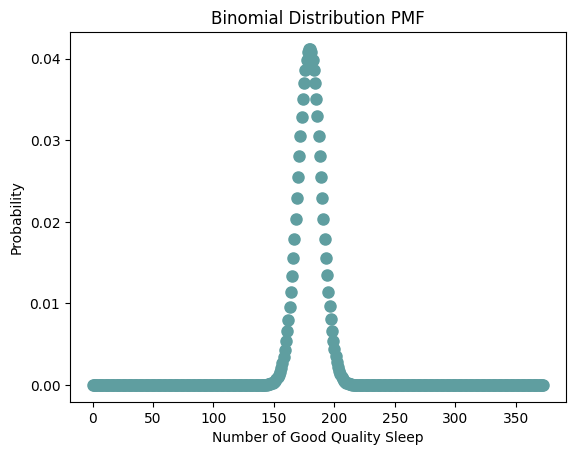

In [ ]:
# Your Implementation Here

# Find p and q values for the quality of sleep 
# -- assuming p is the probability of having a good quality of sleep (>=8) 
#       and q is the probability of having a "not good" quality of sleep (<8)
p, q = 0, 0

for i in range(len(df)):
    if df.loc[i,'Quality of Sleep'] >= 8:
        p += 1
    else:
        q += 1

p = round((p/len(df)), 2)
q = round((q/len(df)), 2)

print(f"Probability of good quality sleep (p): {p}")
print(f"Probability of non-good quality sleep (q): {q}")

# Binomial Distribution
n = len(df)  # Total number of trials (total number of people surveyed)
for i in range(n):
    # Probability of having i good quality sleep out of n trials
    prob = binom.pmf(i, n, p)
plt.plot(range(n), [binom.pmf(i, n, p) for i in range(n)], 'o', ms=8, label='binom pmf', color='cadetblue')
plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Good Quality Sleep')
plt.ylabel('Probability')
plt.show()



**Task 2: Geometric Distribution**
- Calculate the number of trials until you first observe poor sleep quality (Quality ≤4).

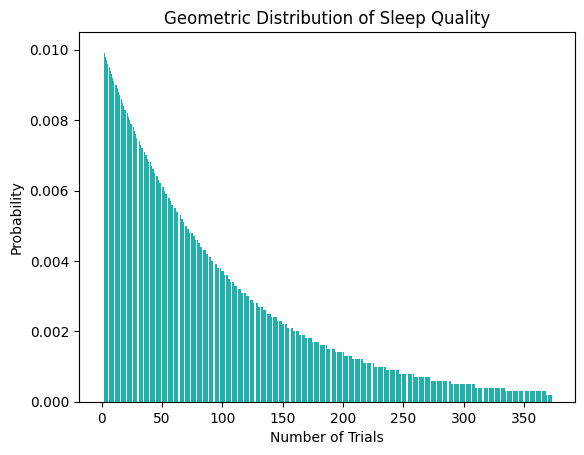

In [6]:
# Your Implementation Here

np.set_printoptions(legacy='1.25')

# Find p
p = 0
n = len(df)

for i in range(n):
    if df.loc[i,'Quality of Sleep'] <= 4:
        p += 1

p = round((p/n), 2)

# Find the geometric distribution of sleep quality
geom_dist = []
for i in range(n):
    geom_dist.append(round(geom.pmf(i, p), 4))


# Plot the geometric distribution of sleep quality
plt.bar(range(n), geom_dist, color='lightseagreen')
plt.title('Geometric Distribution of Sleep Quality')
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.show()


**Task 3: Hypergeometric Distribution**
- Perform hypergeometric sampling for a subgroup (e.g., high stress individuals).

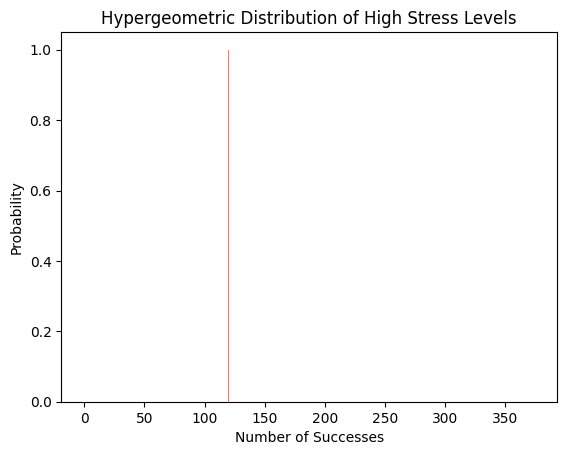

In [13]:
# Your Implementation Here

N = len(df)
n = N # sample size
K = 0

# Find the total number of people with high stress levels
# -- I assume that high stress levels >= 7
for i in range(N):
    if df.loc[i,'Stress Level'] >= 7:
        K += 1

# Find the hypergeometric distribution of high stress levels
hypergeom_dist = []
for i in range(n+1):
    hypergeom_dist.append(round(hypergeom.pmf(i, N, K, n), 4))

# Plot the hypergeometric distribution of high stress levels
plt.bar(range(n+1), hypergeom_dist, color='lightcoral')
plt.title('Hypergeometric Distribution of High Stress Levels')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()


**Task 4: Poisson Distribution**
- Simulate the weekly occurrence of poor sleep quality cases.

0.09380000000000001


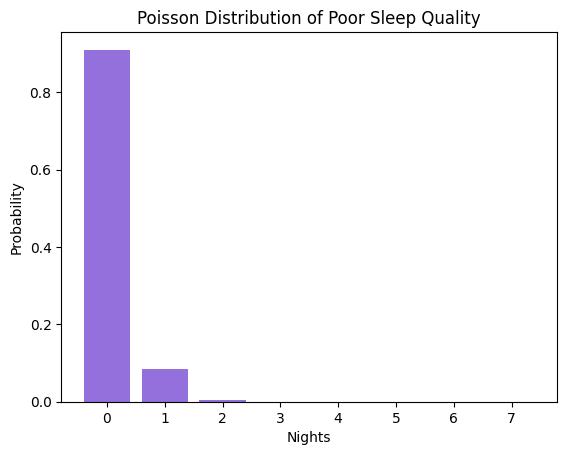

In [ ]:
# Your Implementation Here

# Remind: Poor sleep quality is defined as <= 4

N = len(df)
p = 0
for i in range(len(df)):
    if df.loc[i,'Quality of Sleep'] <= 4:
        p += 1
p = round((p/N), 4)


mu = p*7 # mean: multiply by 7 (days) to get the weekly mean

n = 7 # sample size
poisson_dist = []
for i in range(n+1):
    poisson_dist.append(round(poisson.pmf(i, mu), 4))

# Plot the Poisson distribution of poor sleep quality
plt.bar(range(n+1), poisson_dist, color='mediumpurple')
plt.title('Poisson Distribution of Poor Sleep Quality')
plt.xlabel('Nights')
plt.ylabel('Probability')
plt.show()


### Part 2: Bayesian Inference (Your Implementation)
- Update the probability of good sleep quality based on new evidence (e.g., low stress levels).


In [9]:
# Provided Bayesian Function
def bayes(prior, likelihood, evidence):
    return (likelihood * prior) / evidence

# Your Implementation Here

# P(A): Probability of having a good quality of sleep
# P(B): Probability of having low stress levels
# P(A|B): Probability of having a good quality of sleep given low stress levels
# P(B|A): Probability of having low stress levels given good quality of sleep

N = len(df) # Total number of people

# Find P(A) and P(B)
p_A = 0 # initializing P(A)
p_B = 0 # initializing P(B)

for i in range(N):
    if df.loc[i,'Quality of Sleep'] >= 8:
        p_A += 1
    if df.loc[i,'Stress Level'] <= 4:
        p_B += 1

p_A = round((p_A/N), 4) # real P(A)
p_B = round((p_B/N), 4) # real P(B)

print("P(A):", p_A)
print("P(B):", p_B)

# Find P(B|A)
p_B_given_A = 0 # initializing P(B|A)
good_sleep_qty = 0 # initializing low stress levels
for i in range(N):
    if df.loc[i,'Quality of Sleep'] >= 8:
        good_sleep_qty += 1
        if df.loc[i,'Stress Level'] <= 4:
            p_B_given_A += 1
p_B_given_A = round((p_B_given_A/good_sleep_qty), 4) # real P(B|A)
print("P(B|A):", p_B_given_A)

# Find P(A|B)
p_A_given_B = bayes(p_A, p_B_given_A, p_B) # P(A|B) = P(B|A) * P(A) / P(B)
print("P(A|B):", round(p_A_given_B,4))





P(A): 0.4813
P(B): 0.377
P(B|A): 0.6444
P(A|B): 0.8227


### Part 3: Hypothesis Testing (Your Implementation)
- Conduct hypothesis testing to compare groups (e.g., low vs high stress levels) in terms of sleep quality.


In [10]:
# Your Implementation Here

group1 = df[df['Stress Level'] <= 3]['Quality of Sleep']
group2 = df[df['Stress Level'] >= 7]['Quality of Sleep']
t_stat, p_val = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sleep quality between low and high stress levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sleep quality between low and high stress levels.")


T-statistic: 47.3424949927514
P-value: 9.143330100281528e-107
Reject the null hypothesis: There is a significant difference in sleep quality between low and high stress levels.


### Part 4: Visualization


**Histogram of Sleep Duration**


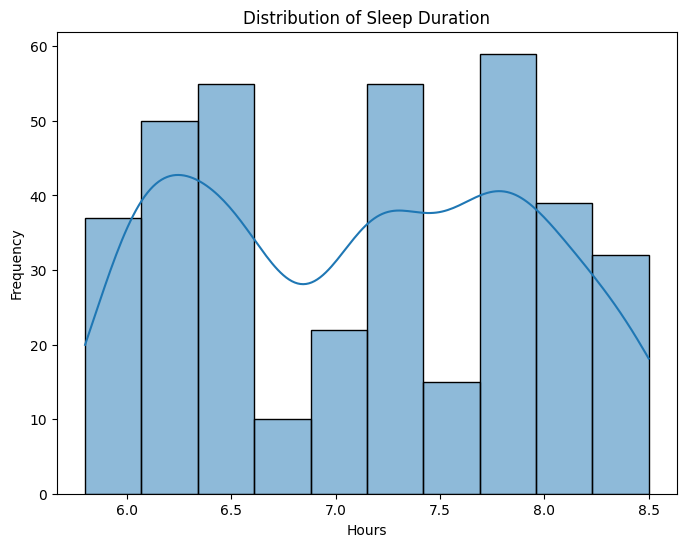

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

**Scatter Plot of Physical Activity vs. Sleep Quality**


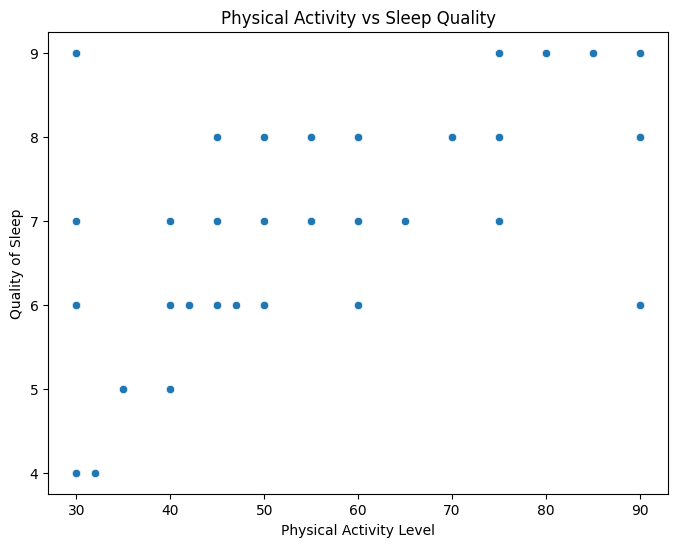

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.title('Physical Activity vs Sleep Quality')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.show()


---

### **Submission Guidelines**
1. Submit your completed notebook (.ipynb file) with all code cells executed.
2. Ensure all markdown cells explain your steps clearly.
3. Include visualizations embedded within the notebook.

---

### Grading Criteria:
- Correct implementation of probability models (30 points).
- Accurate Bayesian inference calculations (20 points).
- Proper hypothesis testing with statistical significance (20 points).
- Quality of visualizations (20 points).
- Documentation and clarity within the notebook (10 points).

---
